In [293]:
from cProfile import label
import sys
import json
import math
import os
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from scipy import stats
import matplotlib.pyplot as plt

import os
import seaborn as sns

In [ ]:
data[group] = { 'rank':int, #accending rank of team score (1 lowest)
        'directory':str, #drectory to save files easier'
        'imp_rank':int,#rank of how much they improved ep1vs2 (1 lowest improvemnt or worsening)
        '1': {'rank':int,#same as above for all episodes
                    'meds': dataframe of medics,
                    'engs':dataframe of engs, 
                    'directory':str,#same as above
                    'med_playerid':dataframe of player,
                    'eng_player_id':dataframe of player,
                    'global':team dataframe of episode
                    }

}

In [309]:
directory ='/Users/josecordova/Desktop/Michigan/545/project/TED-Minimap/output/'# '/Users/josecordova/Documents/cmu/TED'
os.chdir(directory)
labels = ['Workload','Skill','Effort']
lims=[1,0.8,1]


data = {}
episodes_score = {}
group_scores = {}
improvement_score = {}
size=29
df_global = pd.DataFrame(0, index=np.arange(size), columns=labels)
np_skills = np.zeros((size,50))
np_workload = np.zeros((size,50))
np_effort = np.zeros((size,50))


np_skills_eng = []
np_workload_eng = []
np_effort_eng =[]

np_skills_med = []
np_workload_med = []
np_effort_med =[]



df_eng_global = pd.DataFrame(0, index=np.arange(size), columns=labels)
df_med_global = pd.DataFrame(0, index=np.arange(size), columns=labels)
df_ep1 = pd.DataFrame(0, index=np.arange(size), columns=labels)
df_ep2 = pd.DataFrame(0, index=np.arange(size), columns=labels)
eng_global=0
med_global=0
time=range(0,290,10)
j=0
for group in sorted(os.listdir(directory)):
    if '.' in group: 
        continue
    data[group]={}
    data[group]['1'] = {}
    data[group]['2'] = {}

    curr_directory = directory+group+'/'
    data[group]['directory']=curr_directory
    data[group]['meds'] = pd.DataFrame(0, index=np.arange(size), columns=labels)
    data[group]['engs'] = pd.DataFrame(0, index=np.arange(size), columns=labels)

    for episode in sorted(os.listdir(curr_directory)):

        if '.' in episode: 
            continue
        data[group][episode]['directory'] = curr_directory +episode+'/'
        data[group][episode]['label'] = group + '_' +episode
        data[group][episode]['global'] = pd.read_csv(group+'/' +episode +'_global.csv')
        data[group][episode]['score']= (50*data[group][episode]['global']['triage_count_red']+data[group][episode]['global']['triage_count_yellow']*30 \
            +data[group][episode]['global']['triage_count_green']*10).sum()

        #data[group][episode]['global'] =data[group][episode]['global'].groupby(np.arange(len(data[group][episode]['global']))//3).mean()

        data[group][episode]['global']['time'] = range(0,10*len(data[group][episode]['global']),10)



        data[group][episode]['global'].rename(columns = {'process_skill_use_s':'Skill', 'process_effort_s':'Effort','process_workload_burnt':'Workload'}, inplace = True)

        np_skills[:,j]=data[group][episode]['global']['Skill'].head(size)
        np_effort[:,j]=data[group][episode]['global']['Effort'].head(size)
        np_workload[:,j]=data[group][episode]['global']['Workload'].head(size)
        j+=1
        episodes_score[group+'_'+episode] = data[group][episode]['score']

        for proccess in labels:
            data[group][episode][proccess] = data[group][episode]['global'][proccess].sum()
            df_global[proccess]+=data[group][episode]['global'][proccess]
        
        if episode == '1':
            
            df_ep1[labels]+=data[group][episode]['global'][labels]
        else:
            df_ep2[labels]+=data[group][episode]['global'][labels]

        directory_episode = curr_directory+episode+'/'
        data[group][episode]['meds'] = pd.DataFrame(0, index=np.arange(size), columns=labels)
        data[group][episode]['engs'] = pd.DataFrame(0, index=np.arange(size), columns=labels)
        engs = 0
        meds = 0
        for player in os.listdir(directory_episode):
            if not player.endswith(".csv") : 
                continue
            curr_player = directory_episode+player
            data[group][episode][player[:-4]]= pd.read_csv(curr_player)
            #data[group][episode][player[:-4]]=data[group][episode][player[:-4]].groupby(np.arange(len(data[group][episode][player[:-4]]))//3).mean()

            data[group][episode][player[:-4]].rename(columns = {'skill_s':'Skill', 'effort':'Effort','workload':'Workload'}, inplace = True)
            try:
                data[group][player[:-4]][labels]+=data[group][episode][player[:-4]]
                data[group][player[:-4]][labels]/=2
            except:
                data[group][player[:-4]]=data[group][episode][player[:-4]]




            if player[0] == 'e':
                engs+=1
                eng_global+=1
                data[group][episode]['engs'][labels]+=data[group][episode][player[:-4]][labels]
                df_eng_global[labels]+=data[group][episode][player[:-4]][labels]
                np_skills_eng.append(data[group][episode]['engs']['Skill'])
                np_effort_eng.append(data[group][episode]['engs']['Effort'])
                np_workload_eng.append(data[group][episode]['engs']['Workload'])

            else:
                meds+=1
                med_global+=1
                data[group][episode]['meds'][labels]+=data[group][episode][player[:-4]][labels]
                df_med_global[labels]+=data[group][episode][player[:-4]][labels]


                np_skills_med.append(data[group][episode]['meds']['Skill'])
                np_effort_med.append(data[group][episode]['meds']['Effort'])
                np_workload_med.append(data[group][episode]['meds']['Workload'])


                    

        data[group][episode]['engs']/=engs
        data[group][episode]['meds']/=meds

        data[group]['engs'][labels]+=data[group][episode]['engs'][labels]
        data[group]['meds'][labels]+=data[group][episode]['meds'][labels]
    data[group]['meds']/=2
    data[group]['engs']/=2

    data[group]['score']=data[group]['1']['score'] + data[group]['2']['score']
    group_scores[group]=data[group]['score']

    data[group]['imp_score']=data[group]['2']['score'] - data[group]['1']['score']
    improvement_score[group]=data[group]['imp_score']

df_eng_global /=eng_global
df_med_global/=med_global
df_med_global['Time'] = range(0,10*len(df_med_global),10)
df_eng_global['Time'] = range(0,10*len(df_eng_global),10)

df_ep1/=len(data)
df_ep2/=len(data)

df_global /= len(data)*2
df_global['Time'] = range(0,10*len(df_global),10)
df_global['CI'] = df_global['Workload']+df_global['Skill']+df_global['Effort']
episodes_score = dict(sorted(episodes_score.items(), key=lambda item: item[1]))
df = pd.DataFrame(episodes_score.items())
df.to_csv('ep_scores.csv',index=False)
group_scores = dict(sorted(group_scores.items(), key=lambda item: item[1]))
df = pd.DataFrame(group_scores.items())
df.to_csv('group_scores.csv',index=False)
improvement_score = dict(sorted(improvement_score.items(), key=lambda item: item[1]))
df = pd.DataFrame(improvement_score.items())
df.to_csv('imp_scores.csv',index=False)



i=0
for episode in episodes_score:
    data[episode[:-2]][episode[-1]]['rank']=i
    i+=1
i=0
for group in group_scores:
    data[group]['rank']=len(data)-1-i
    i+=1
i=0
for group in improvement_score:
    data[group]['impr_rank']=i
    i+=1

np_skills_eng = np.array(np_skills_eng)
np_workload_eng = np.array(np_workload_eng)
np_effort_eng =np.array(np_effort_eng)

np_skills_med = np.array(np_skills_med)
np_workload_med = np.array(np_workload_med)
np_effort_med =np.array(np_effort_med)

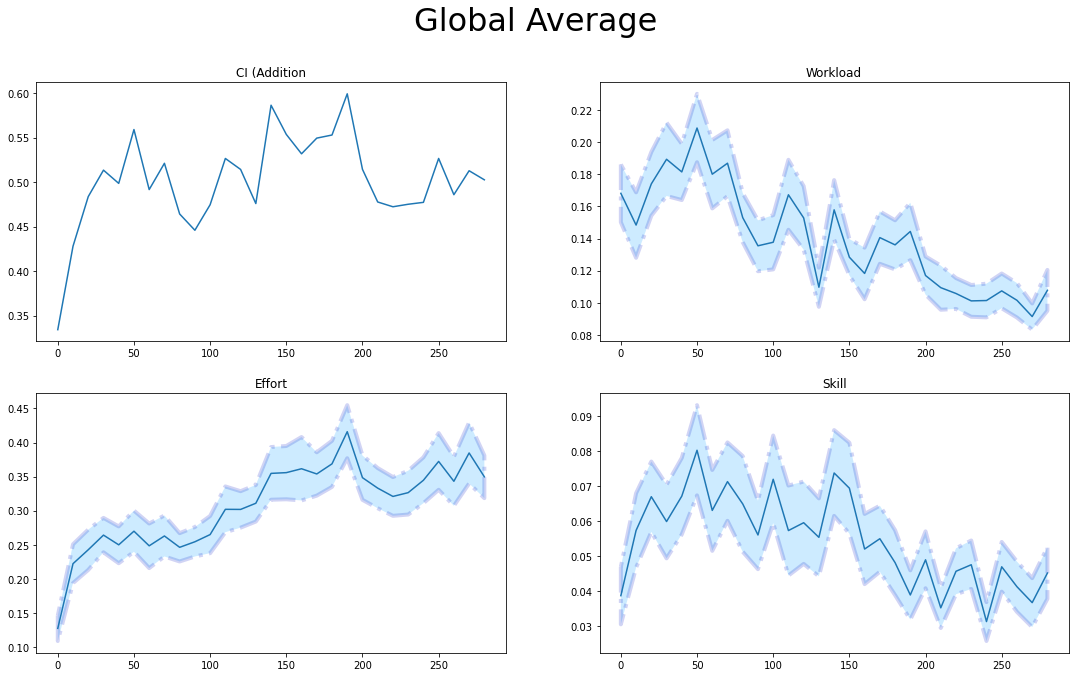

In [304]:
figure, axis = plt.subplots(2, 2)
figure.set_size_inches(18.5, 10.5)

axis[0, 0].plot(df_global['Time'], df_global['CI'])
axis[0, 0].set_title("CI (Addition")
  
axis[0, 1].plot(df_global['Time'], df_global['Workload'])
axis[0, 1].fill_between(df_global['Time'], df_global['Workload']-stats.sem(np_workload,axis=1),  df_global['Workload']+stats.sem(np_workload,axis=1),
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)
axis[0, 1].set_title("Workload")
  
axis[1, 0].plot(df_global['Time'], df_global['Effort'])
axis[1, 0].set_title("Effort")
axis[1, 0].fill_between(df_global['Time'], df_global['Effort']-stats.sem(np_effort,axis=1),  df_global['Effort']+stats.sem(np_effort,axis=1),
alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
linewidth=4, linestyle='dashdot', antialiased=True)

axis[1, 1].plot(df_global['Time'], df_global['Skill'])
axis[1, 1].set_title("Skill")
axis[1, 1].fill_between(df_global['Time'], df_global['Skill']-stats.sem(np_skills,axis=1),  df_global['Skill']+stats.sem(np_skills,axis=1),
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)
figure.suptitle('Global Average',fontsize=32)
plt.show()

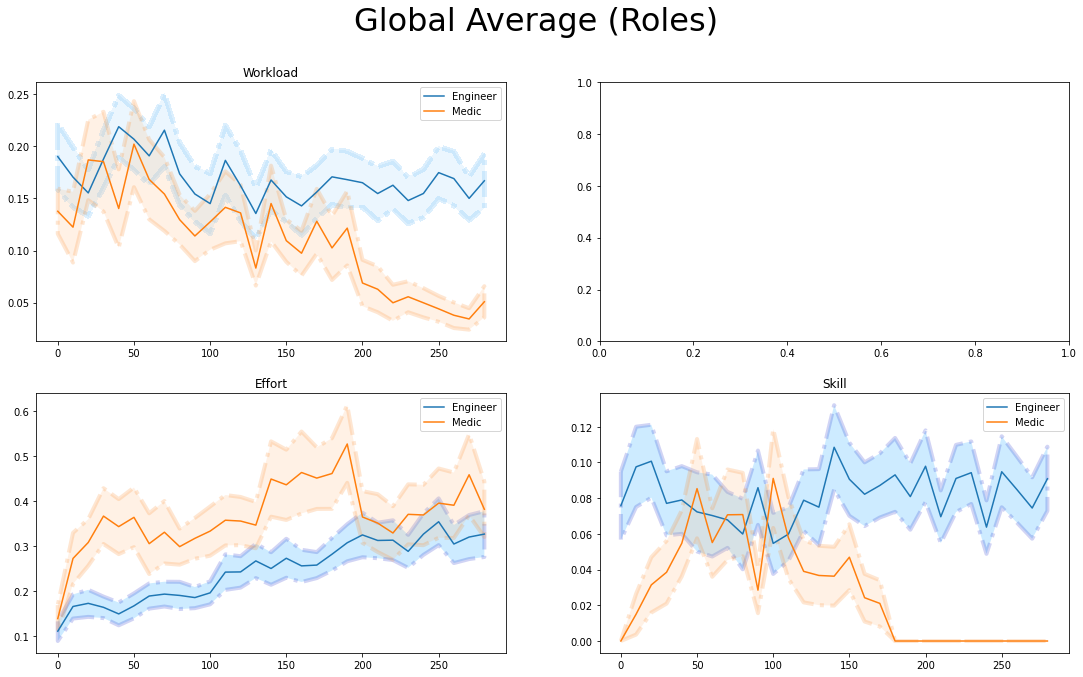

In [307]:
figure, axis = plt.subplots(2, 2)
figure.set_size_inches(18.5, 10.5)

  
axis[0, 0].plot(df_eng_global['Time'], df_eng_global['Workload'],label='Engineer')
axis[0, 0].fill_between(df_global['Time'], df_eng_global['Workload']-stats.sem(np_workload_eng),  df_eng_global['Workload']+stats.sem(np_workload_eng),
    alpha=0.2, edgecolor='#52B2F7', facecolor='#9ED6FE',
    linewidth=4, linestyle='dashdot', antialiased=False)



axis[0, 0].plot(df_med_global['Time'], df_med_global['Workload'],label='Medic')
axis[0, 0].fill_between(df_global['Time'], df_med_global['Workload']-stats.sem(np_workload_med),  df_med_global['Workload']+stats.sem(np_workload_med),
    alpha=0.2, edgecolor='#FA8622', facecolor='#FFBB80',
    linewidth=4, linestyle='dashdot', antialiased=True)



axis[0, 0].legend()
axis[0, 0].set_title("Workload")

axis[1, 0].plot(df_eng_global['Time'], df_eng_global['Effort'],label='Engineer')
axis[1, 0].fill_between(df_global['Time'], df_eng_global['Effort']-stats.sem(np_effort_eng),  df_eng_global['Effort']+stats.sem(np_effort_eng),
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)


axis[1, 0].plot(df_med_global['Time'], df_med_global['Effort'],label='Medic')
axis[1, 0].fill_between(df_global['Time'], df_med_global['Effort']-stats.sem(np_effort_med),  df_med_global['Effort']+stats.sem(np_effort_med),
    alpha=0.2, edgecolor='#FA8622', facecolor='#FFBB80',
    linewidth=4, linestyle='dashdot', antialiased=True)
axis[1, 0].legend()


axis[1, 0].set_title("Effort")

axis[1, 1].plot(df_eng_global['Time'], df_eng_global['Skill'],label='Engineer')
axis[1,1].fill_between(df_global['Time'], df_eng_global['Skill']-stats.sem(np_skills_eng),  df_eng_global['Skill']+stats.sem(np_skills_eng),
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

axis[1, 1].plot(df_med_global['Time'], df_med_global['Skill'],label='Medic')  
axis[1,1].fill_between(df_global['Time'], df_med_global['Skill']-stats.sem(np_skills_med),  df_med_global['Skill']+stats.sem(np_skills_med),
    alpha=0.2, edgecolor='#FA8622', facecolor='#FFBB80',
    linewidth=4, linestyle='dashdot', antialiased=True)
axis[1, 1].set_title("Skill")
axis[1, 1].legend()
figure.suptitle('Global Average (Roles)',fontsize=32)

plt.show()

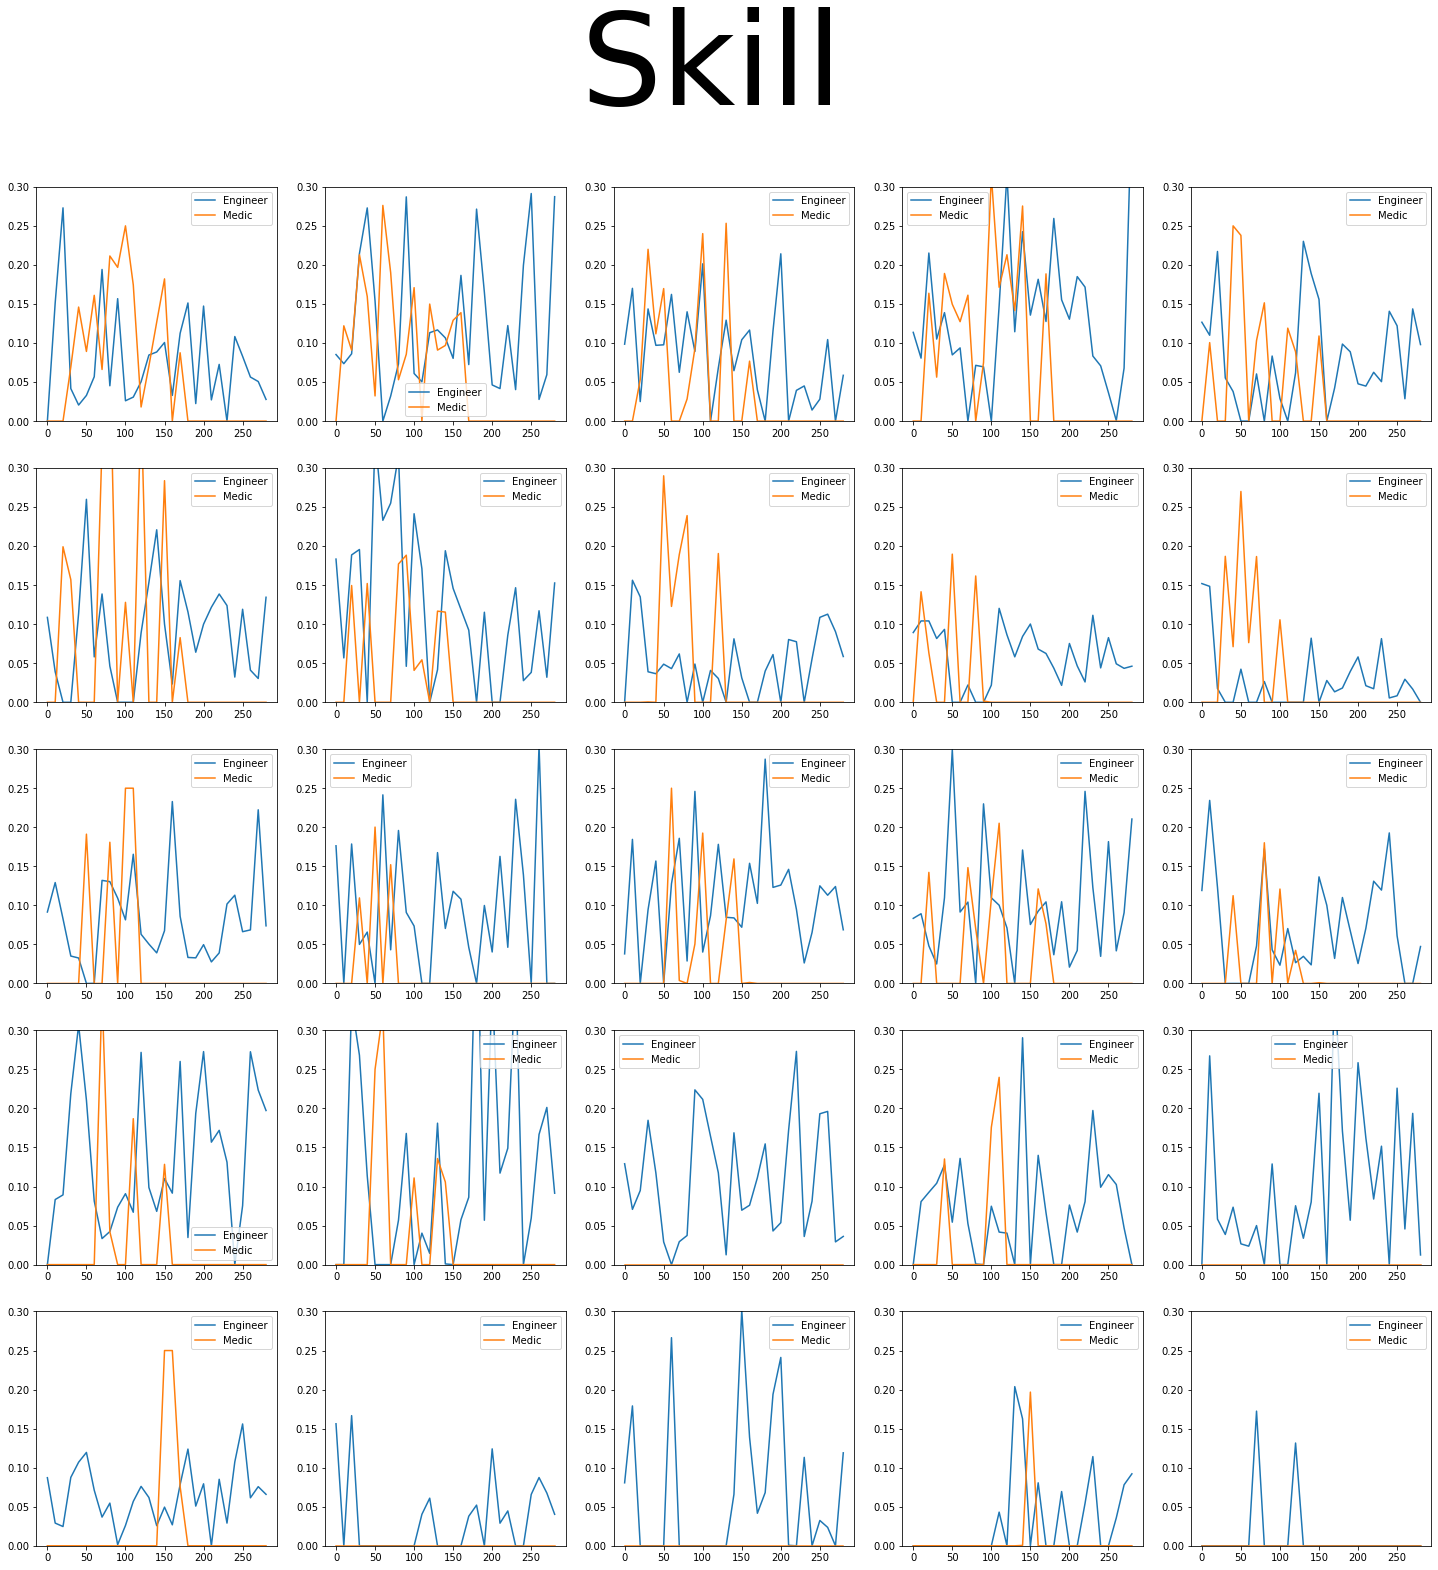

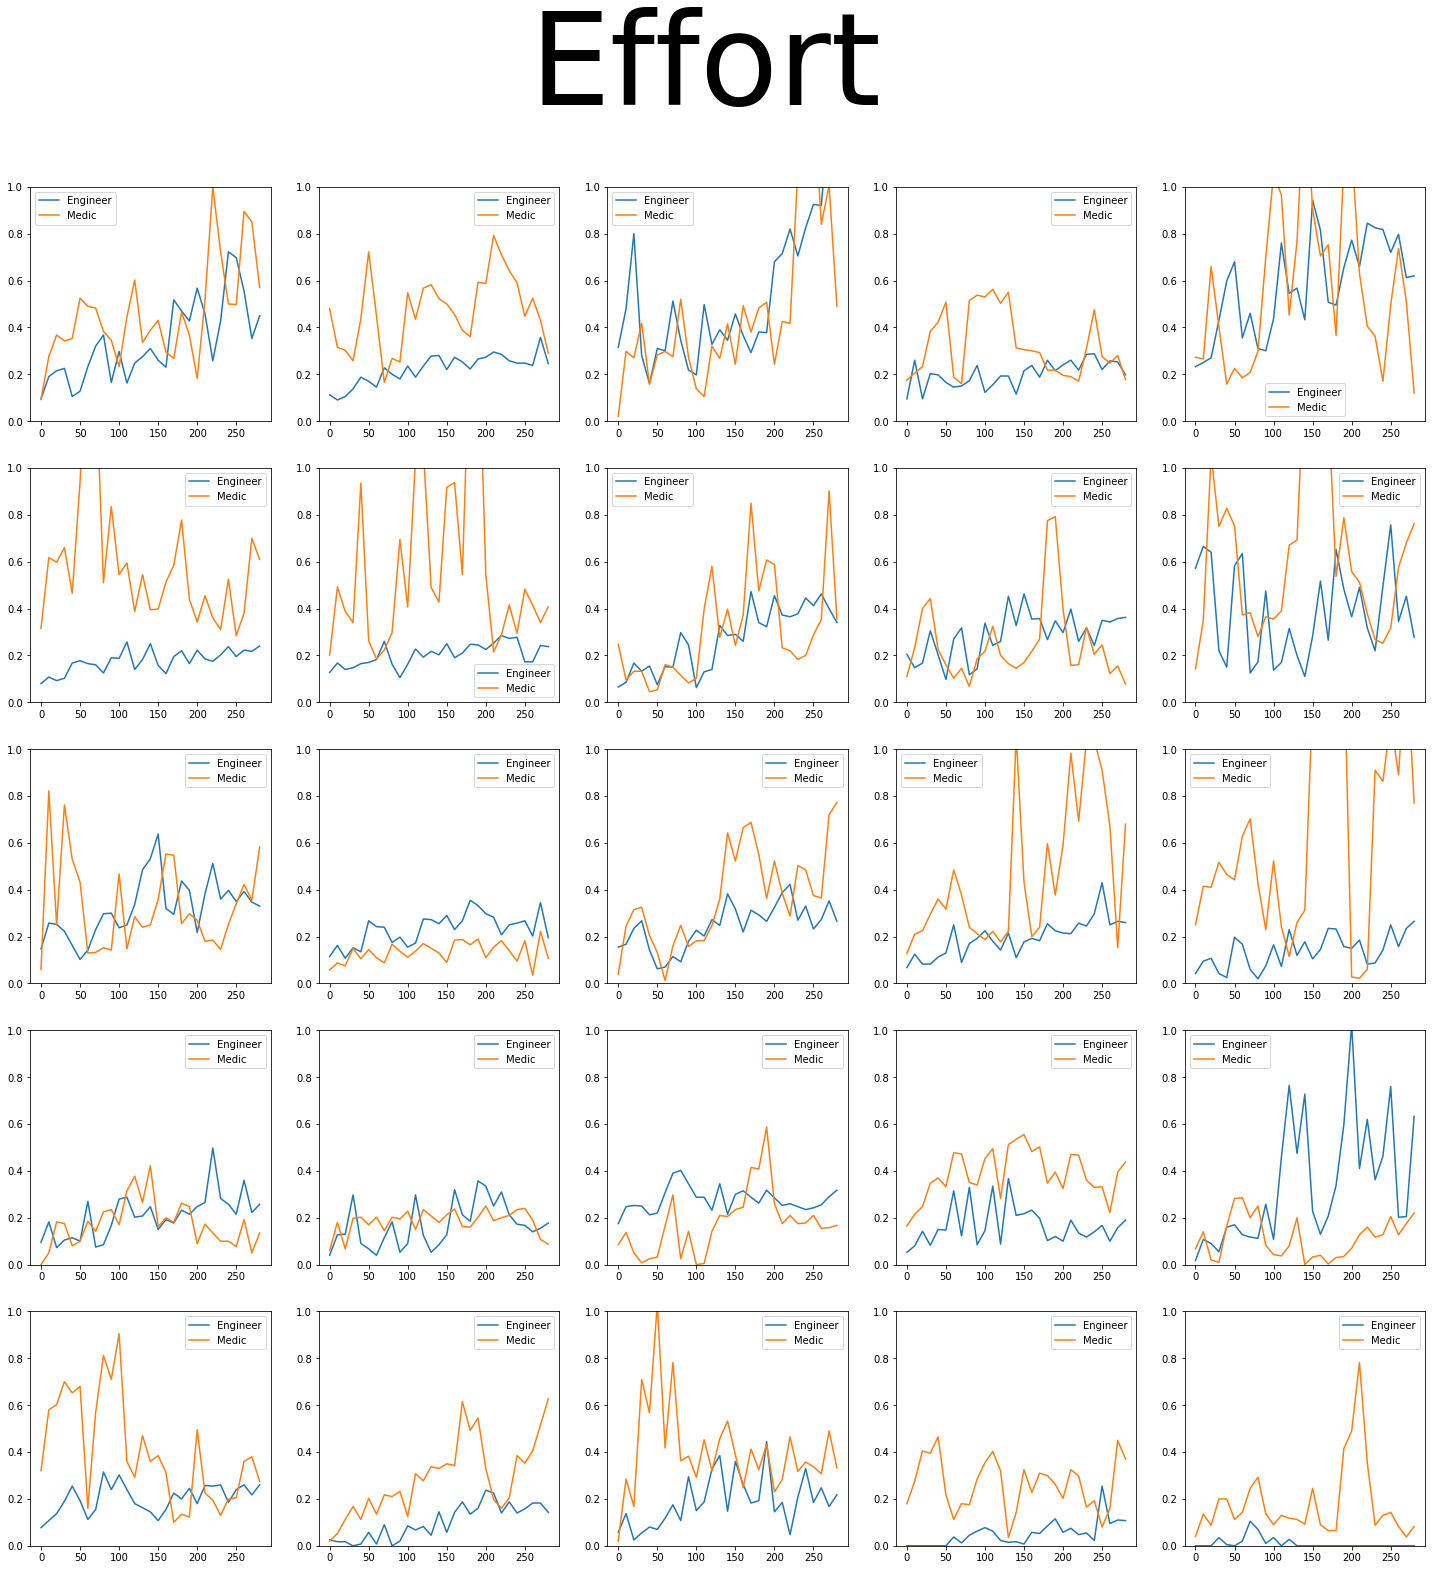

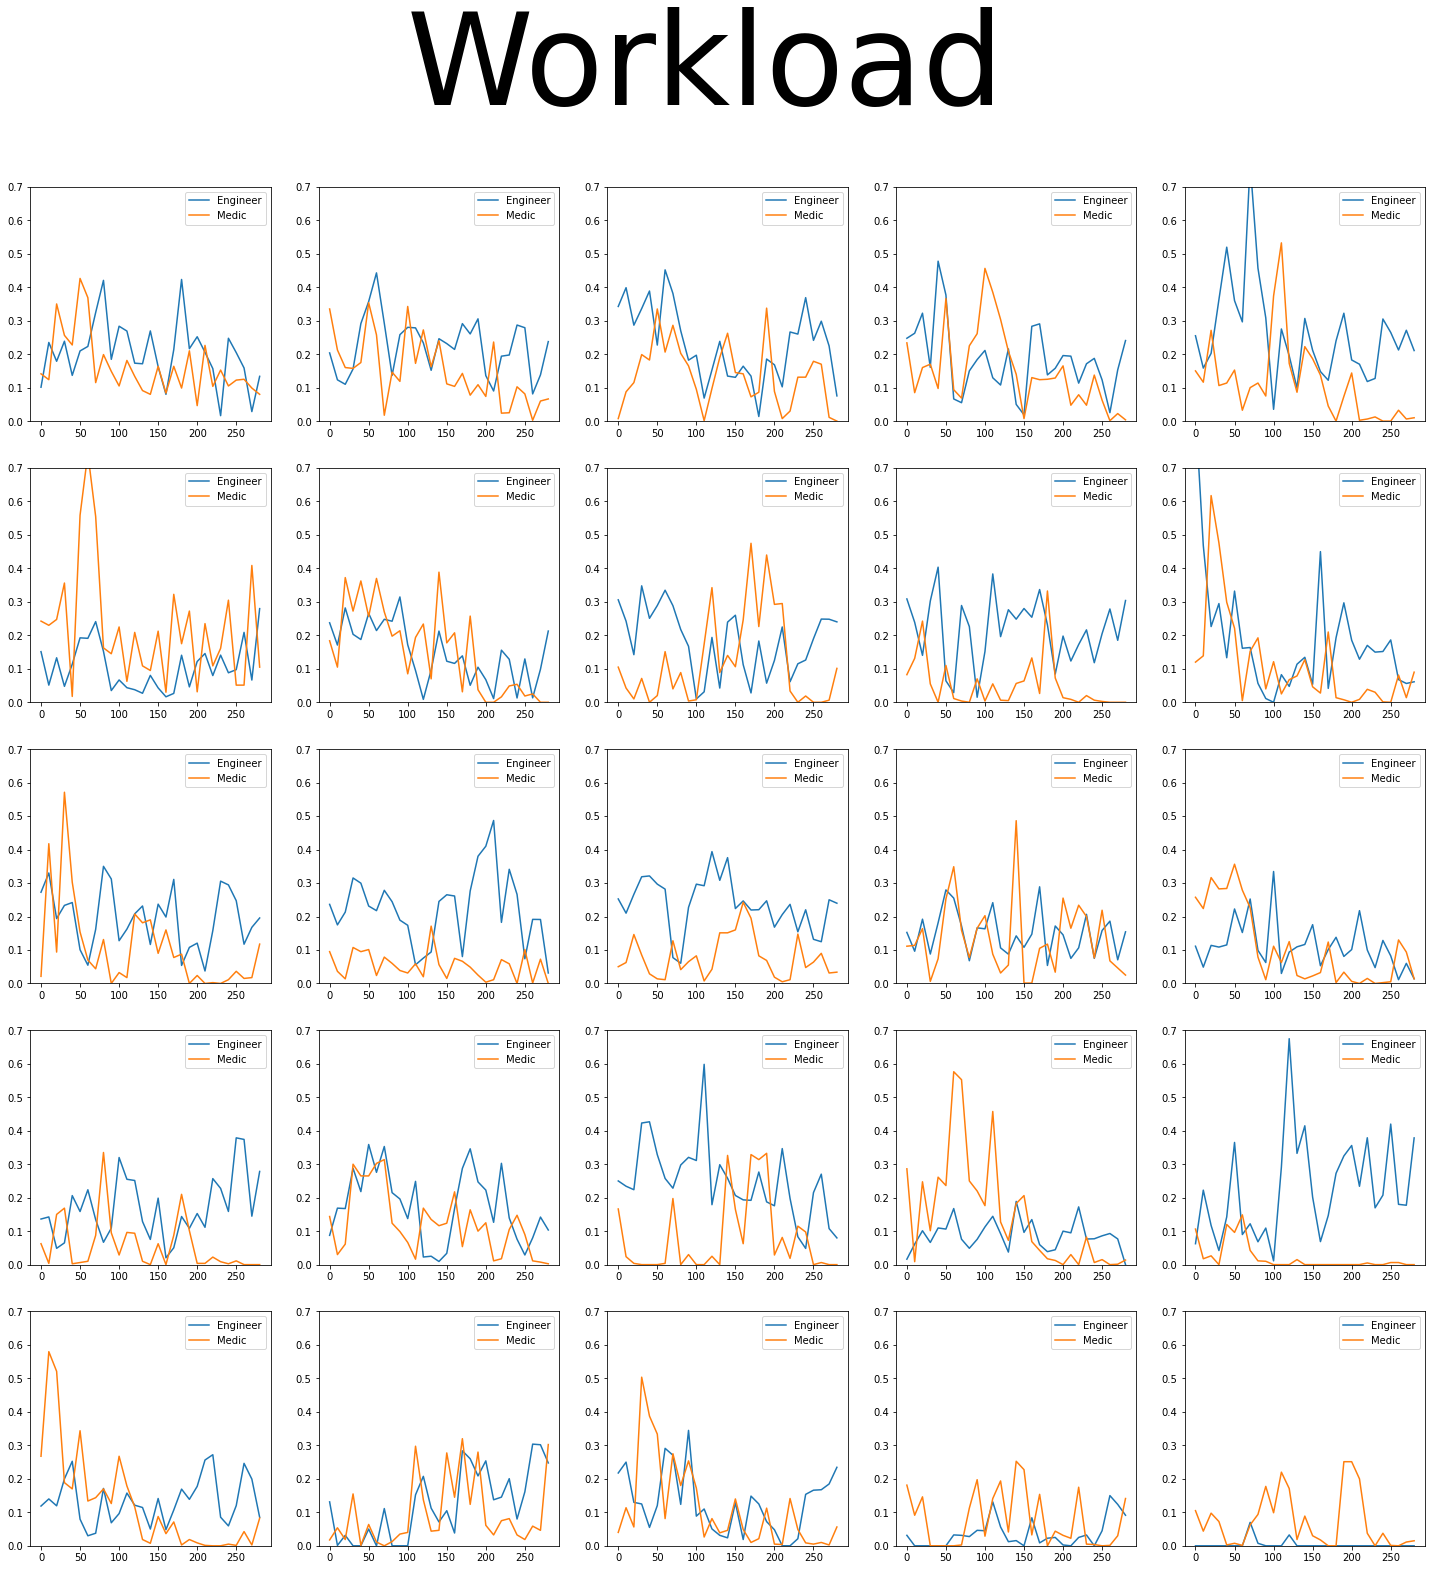

In [308]:
skill_fig, skill_axis = plt.subplots(5, 5)
skill_fig.set_size_inches(25, 25)

effort_fig, effort_axis = plt.subplots(5, 5)
effort_fig.set_size_inches(25, 25)

workload_fig, workload_axis = plt.subplots(5, 5)
workload_fig.set_size_inches(25, 25)

for group in data.values():

    row = math.floor(group['rank']/5)
    column = group['rank']%5


    skill_axis[row, column].plot(df_eng_global['Time'], group['engs']['Skill'],label='Engineer')
    skill_axis[row, column].plot(df_med_global['Time'], group['meds']['Skill'],label='Medic')
    skill_axis[row, column].legend()
    skill_axis[row, column].set_ylim([0,0.3])


    workload_axis[row, column].plot(df_eng_global['Time'], group['engs']['Workload'],label='Engineer')
    workload_axis[row, column].plot(df_med_global['Time'], group['meds']['Workload'],label='Medic')
    workload_axis[row, column].legend()
    workload_axis[row, column].set_ylim([0,0.7])

    effort_axis[row, column].plot(df_eng_global['Time'], group['engs']['Effort'],label='Engineer')
    effort_axis[row, column].plot(df_med_global['Time'], group['meds']['Effort'],label='Medic')
    effort_axis[row, column].legend()
    effort_axis[row, column].set_ylim([0,1])

skill_fig.suptitle('Skill',fontsize=128)
skill_fig.savefig('skill', facecolor='w')


effort_fig.suptitle('Effort',fontsize=128)
effort_fig.savefig('Effort', facecolor='w')

workload_fig.suptitle('Workload',fontsize=128)
workload_fig.savefig('Workload', facecolor='w')

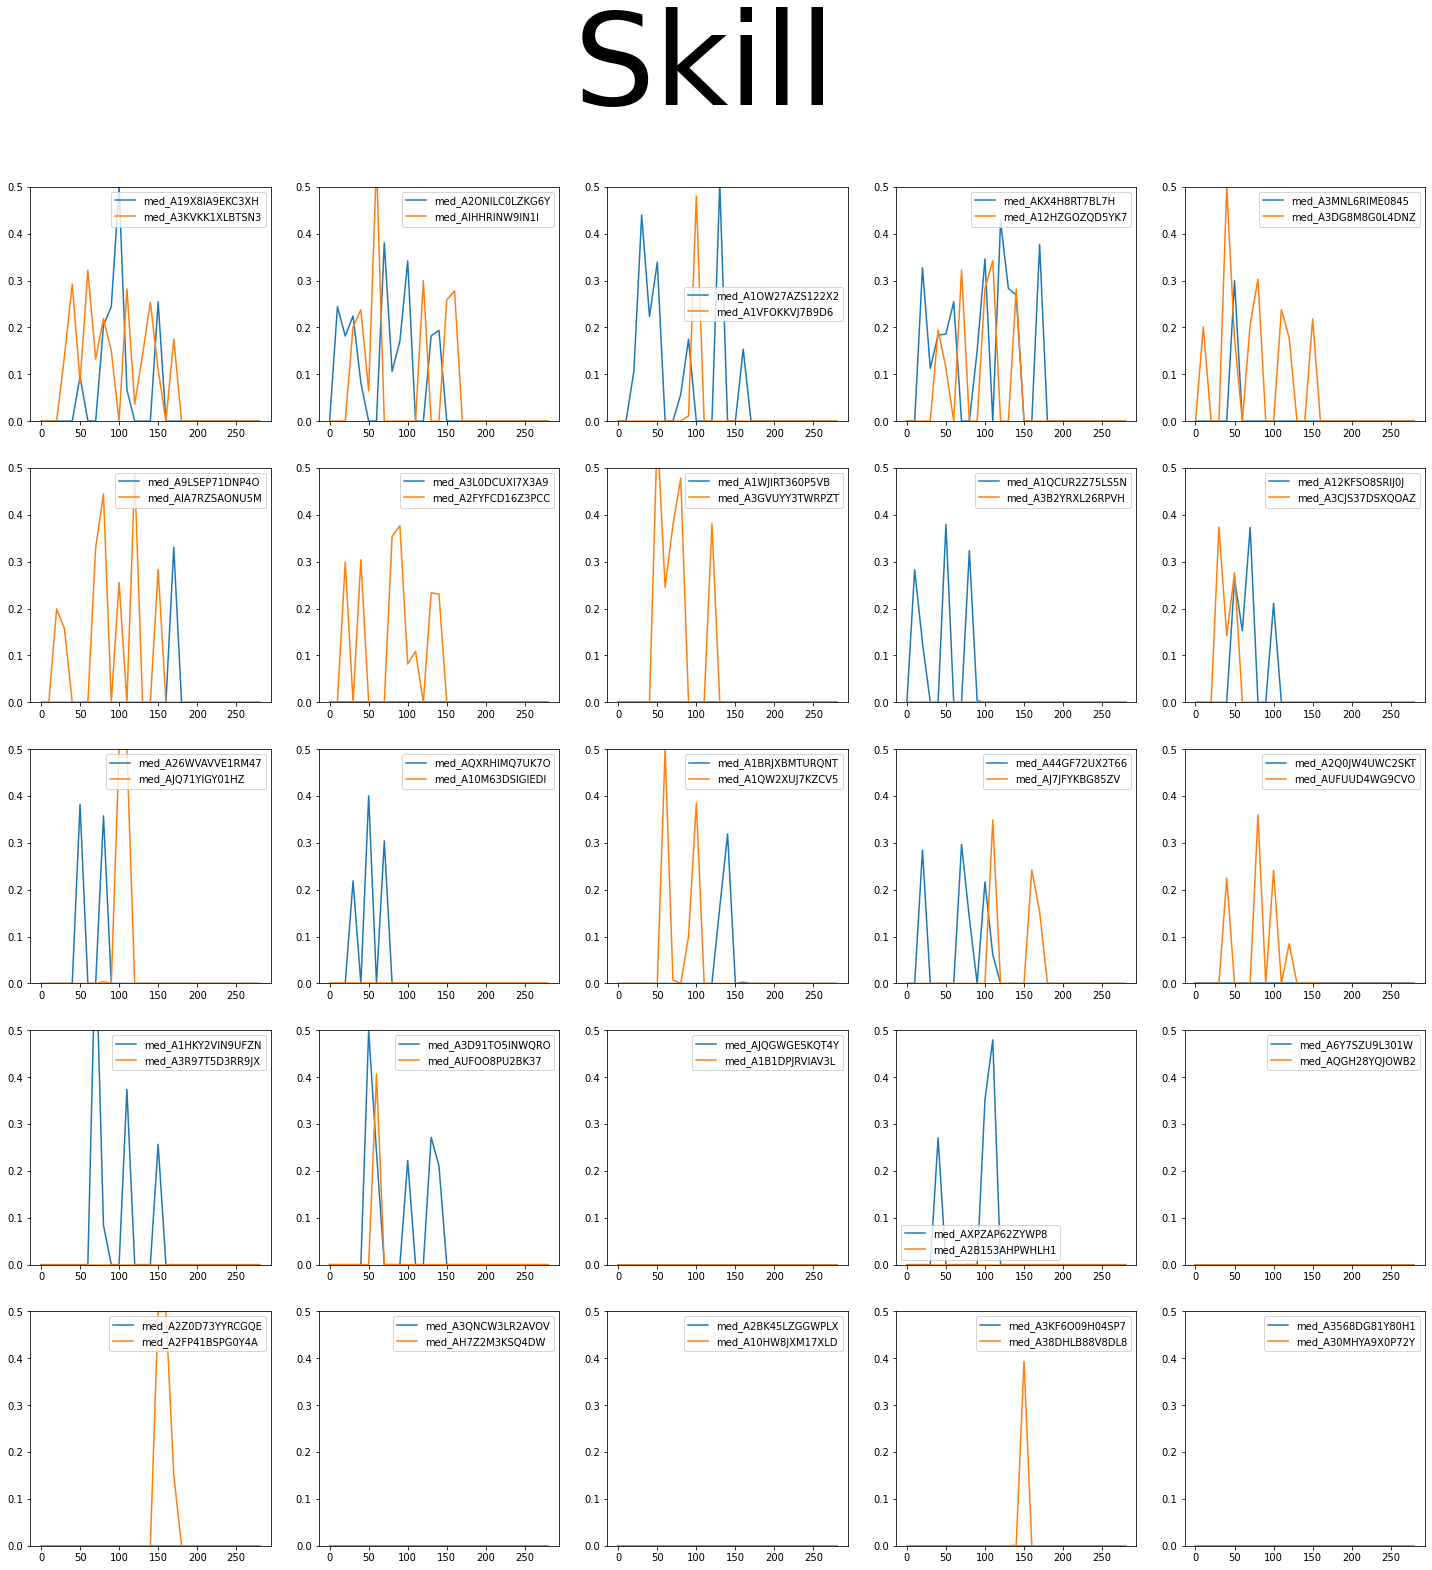

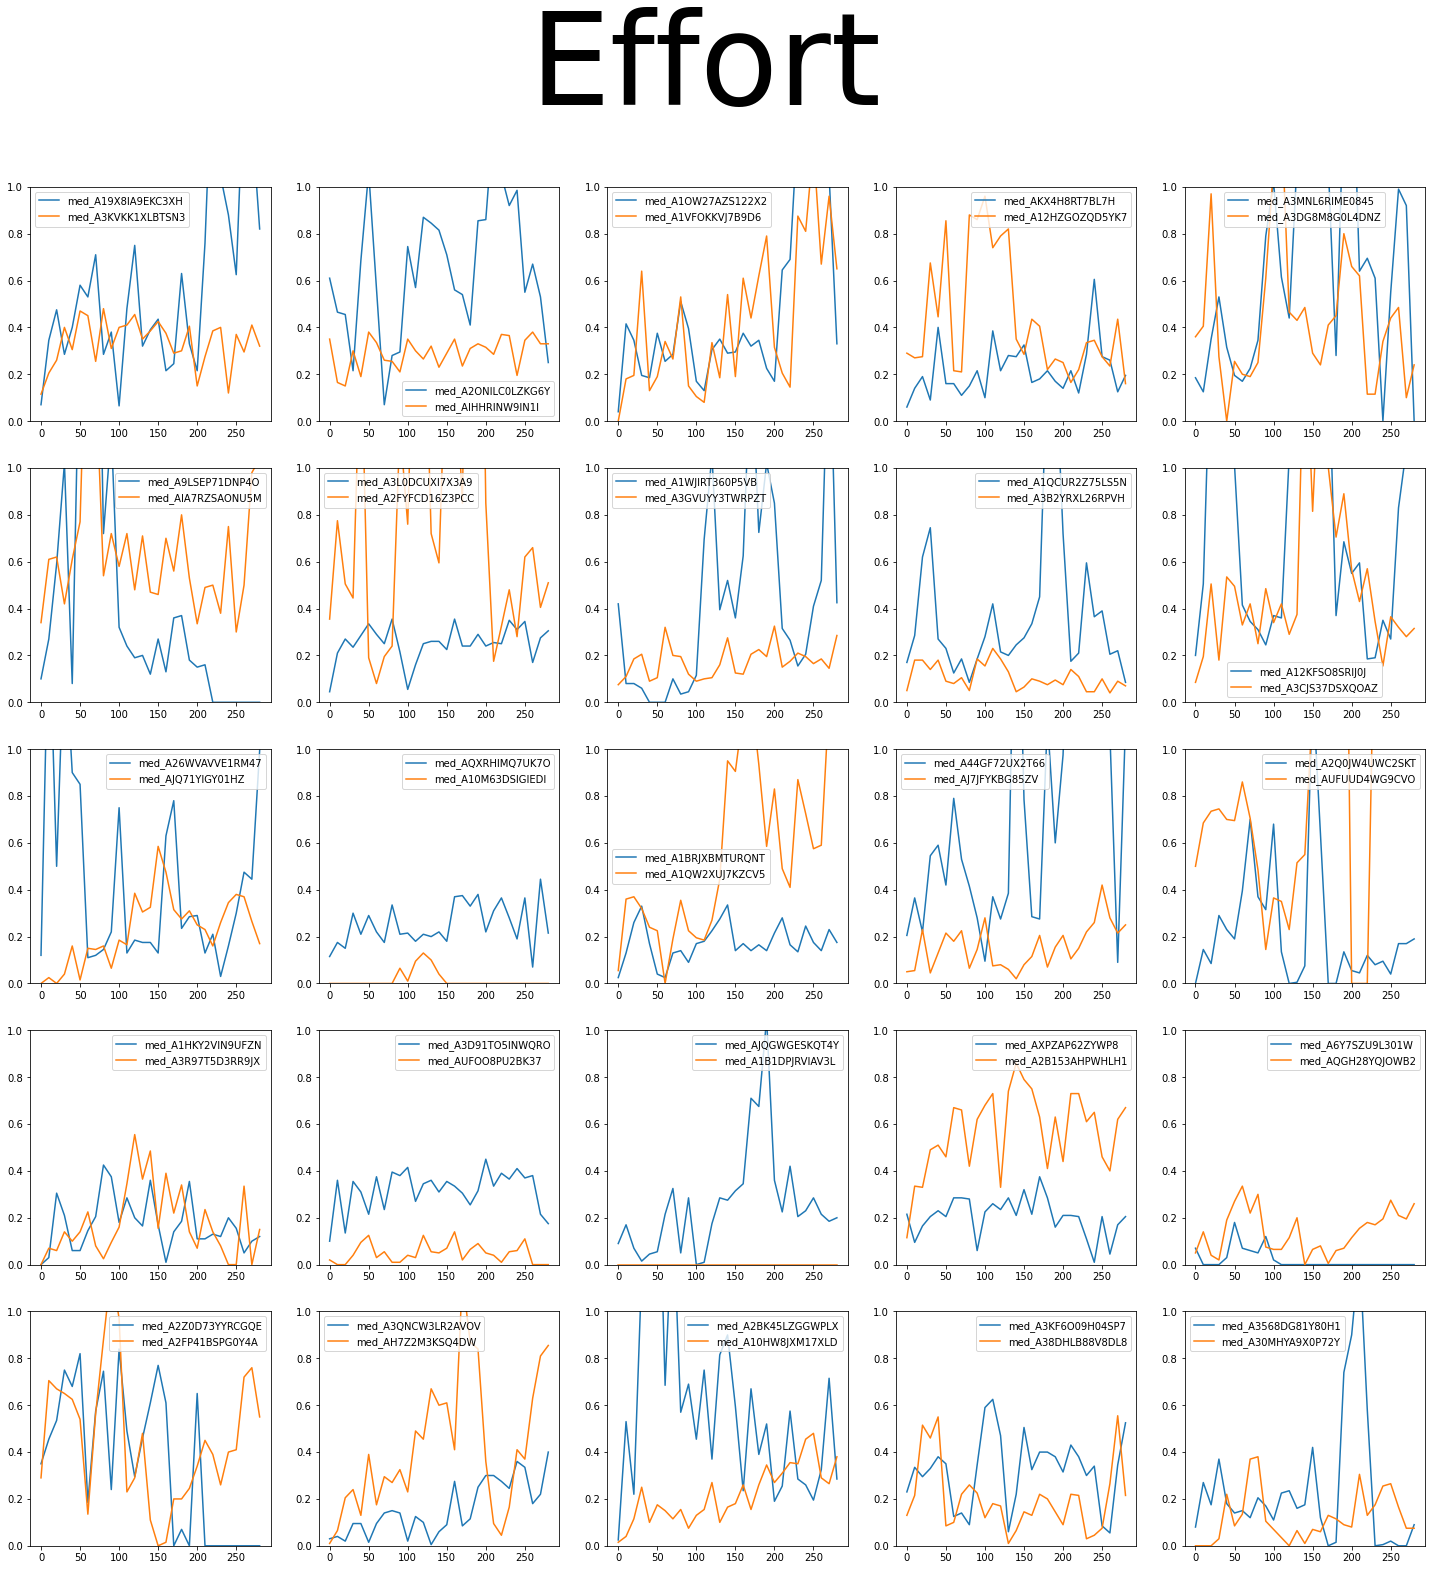

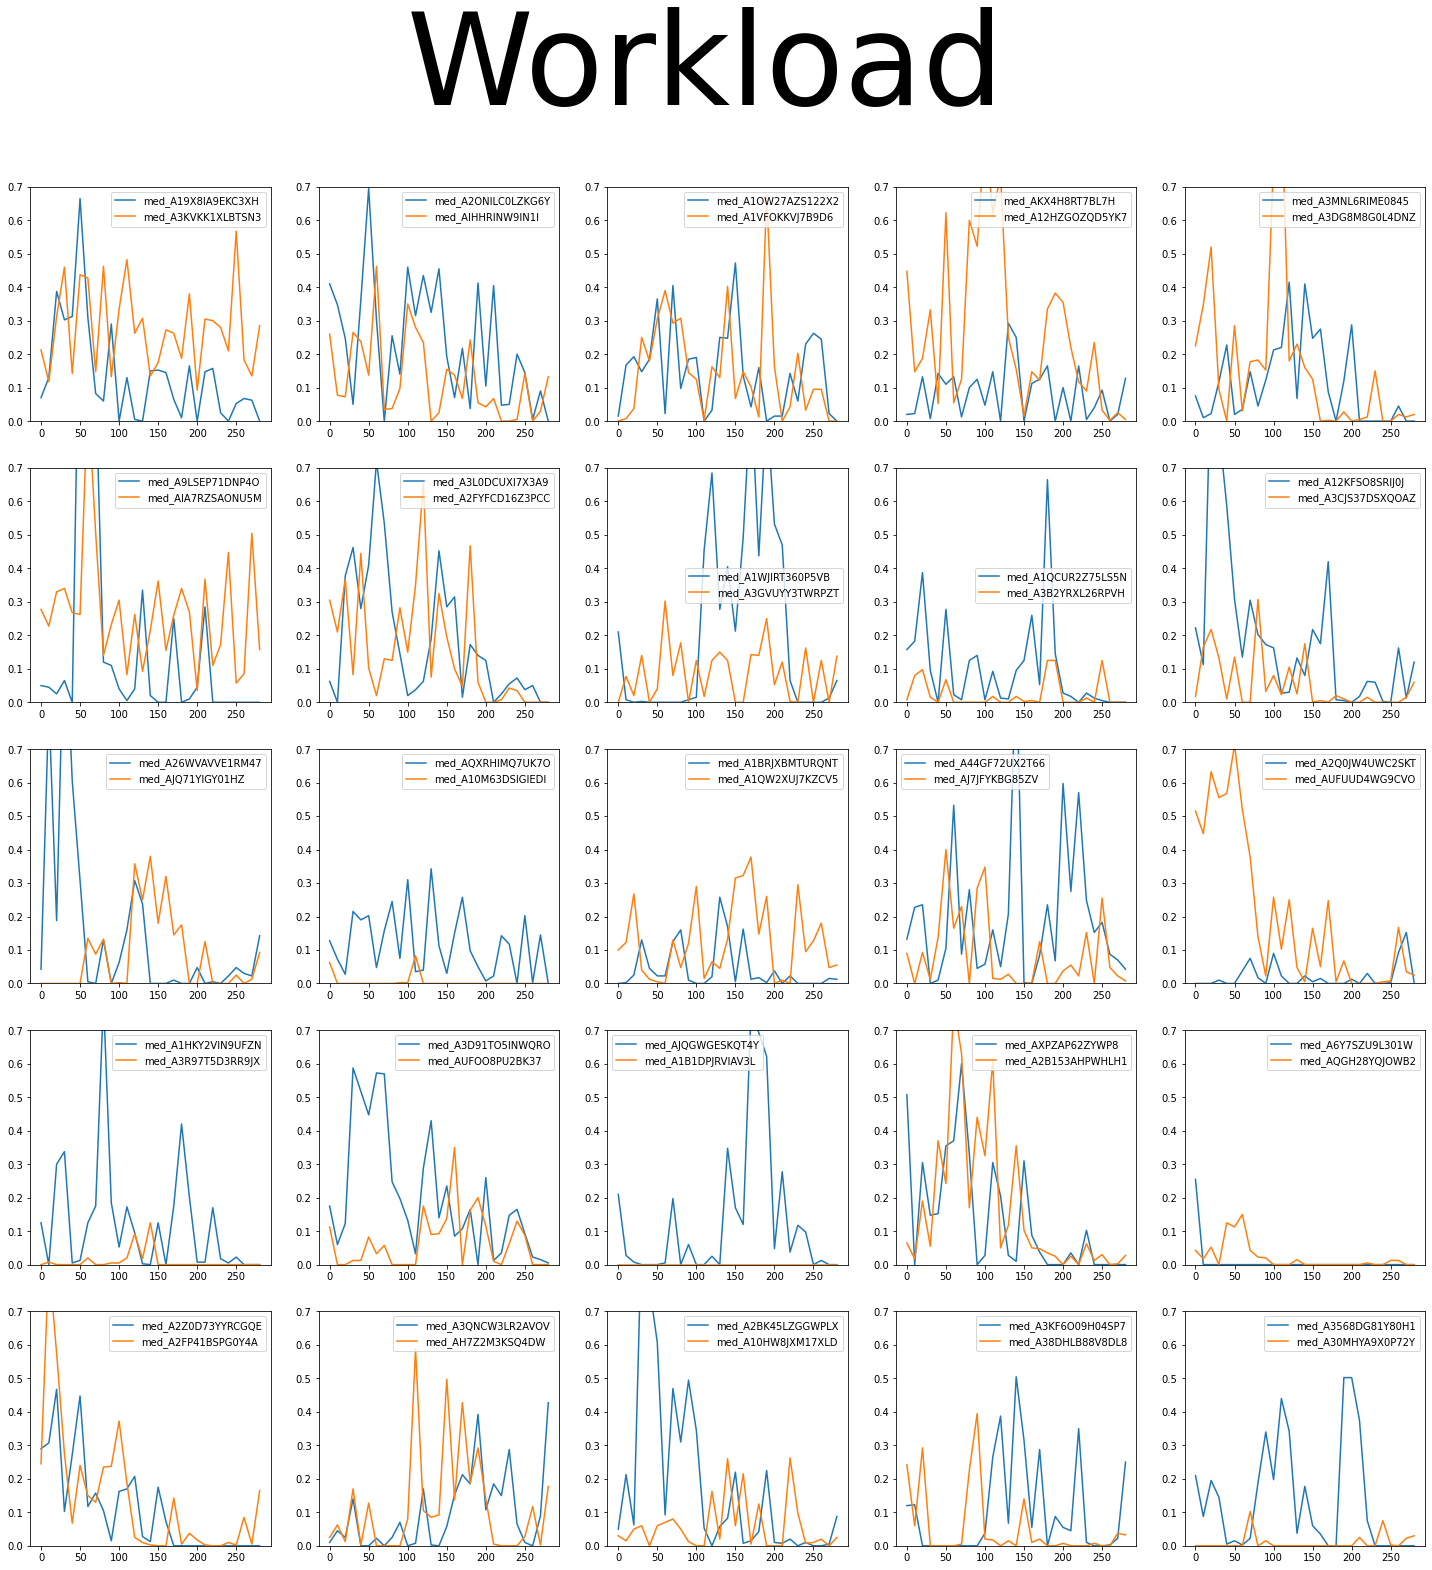

In [244]:
skill_fig, skill_axis = plt.subplots(5, 5)
skill_fig.set_size_inches(25, 25)

effort_fig, effort_axis = plt.subplots(5, 5)
effort_fig.set_size_inches(25, 25)

workload_fig, workload_axis = plt.subplots(5, 5)
workload_fig.set_size_inches(25, 25)

for group in data.values():
    for player in group:
        if not player.startswith('med_'):
            continue


        row = math.floor(group['rank']/5)
        column = group['rank']%5


        skill_axis[row, column].plot(df_eng_global['Time'], group[player]['Skill'],label=player)
        skill_axis[row, column].legend()
        skill_axis[row, column].set_ylim([0,0.5])


        workload_axis[row, column].plot(df_eng_global['Time'], group[player]['Workload'],label=player)
        workload_axis[row, column].legend()
        workload_axis[row, column].set_ylim([0,0.7])

        effort_axis[row, column].plot(df_eng_global['Time'], group[player]['Effort'],label=player)
        effort_axis[row, column].legend()
        effort_axis[row, column].set_ylim([0,1])

skill_fig.suptitle('Skill',fontsize=128)
skill_fig.savefig('Skill Med', facecolor='w')


effort_fig.suptitle('Effort',fontsize=128)
effort_fig.savefig('Effort Med', facecolor='w')

workload_fig.suptitle('Workload',fontsize=128)
workload_fig.savefig('Workload Med', facecolor='w')

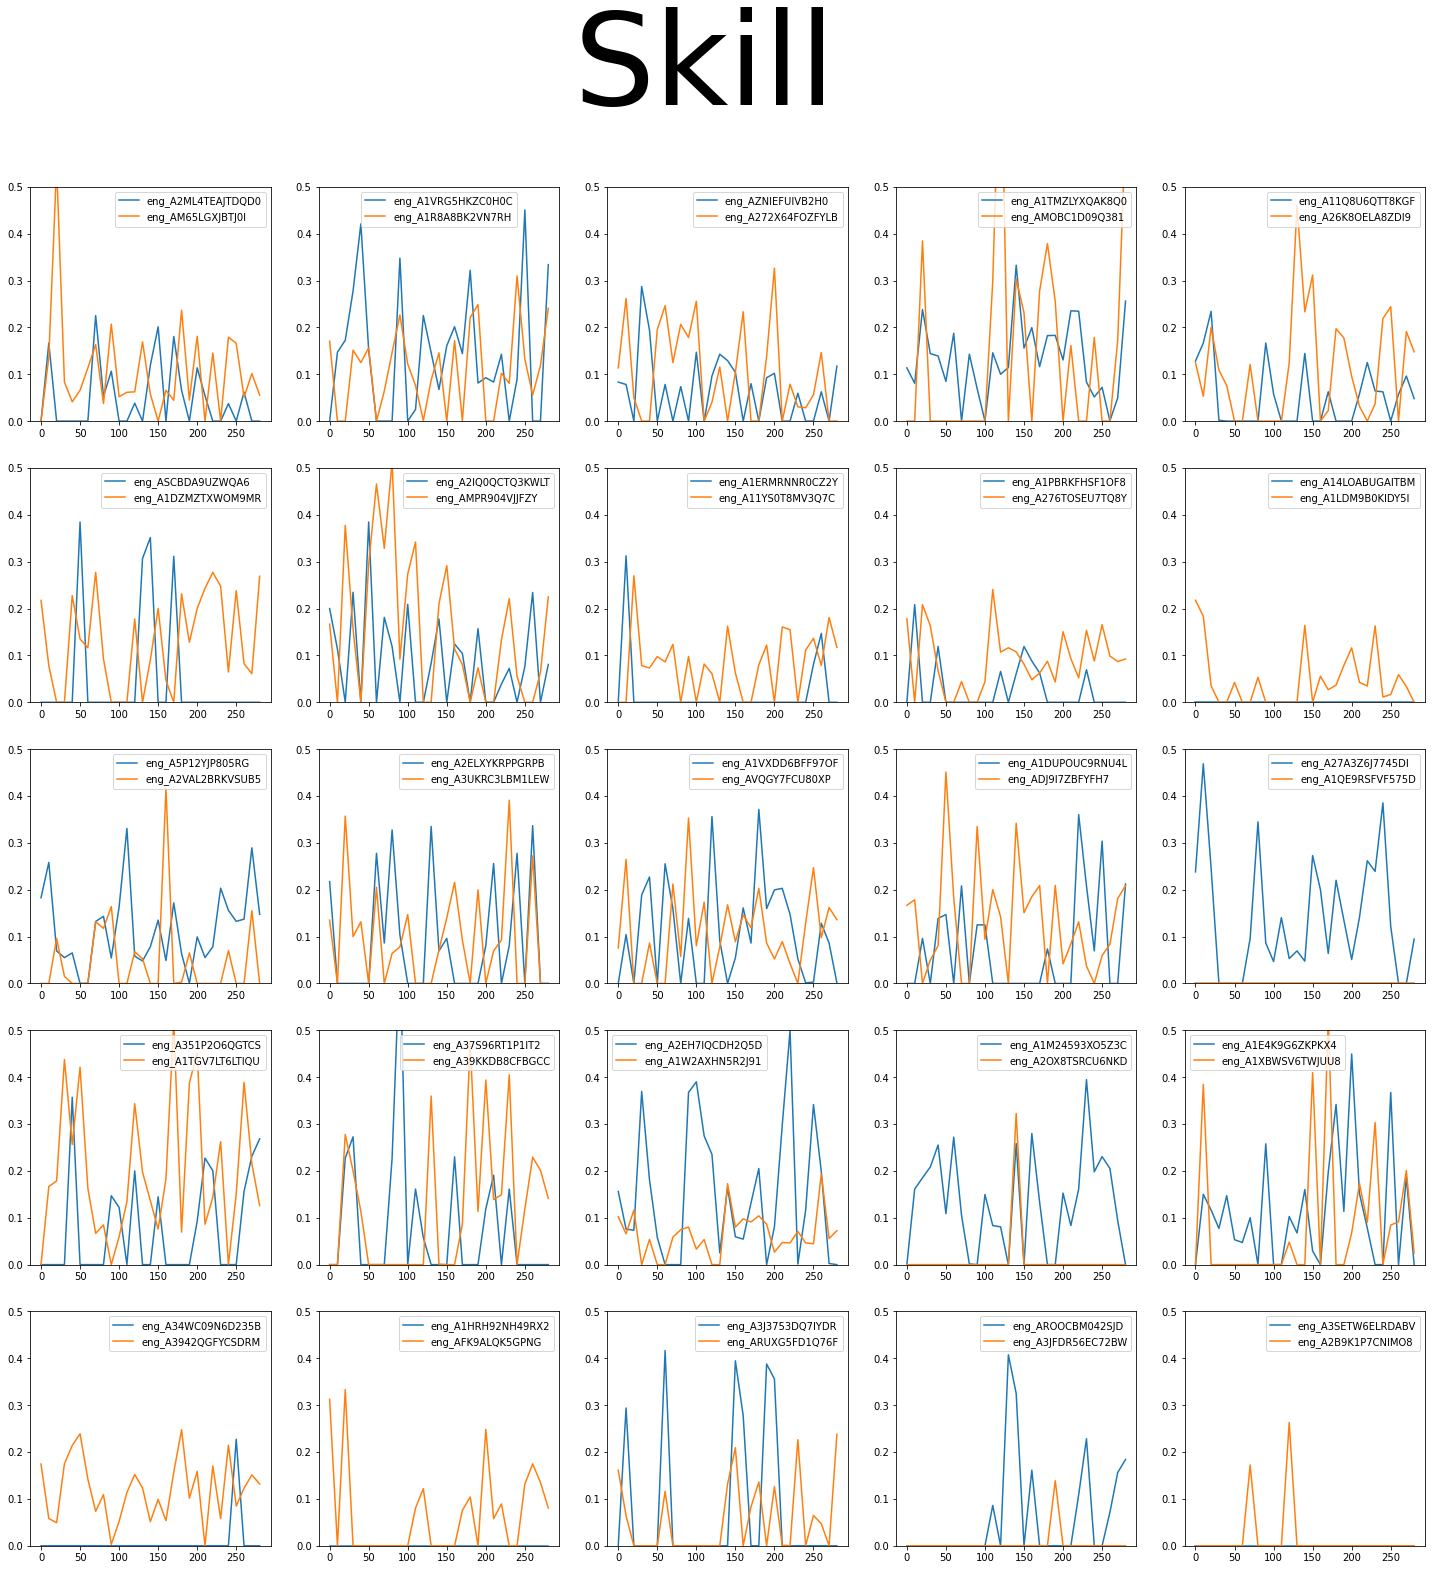

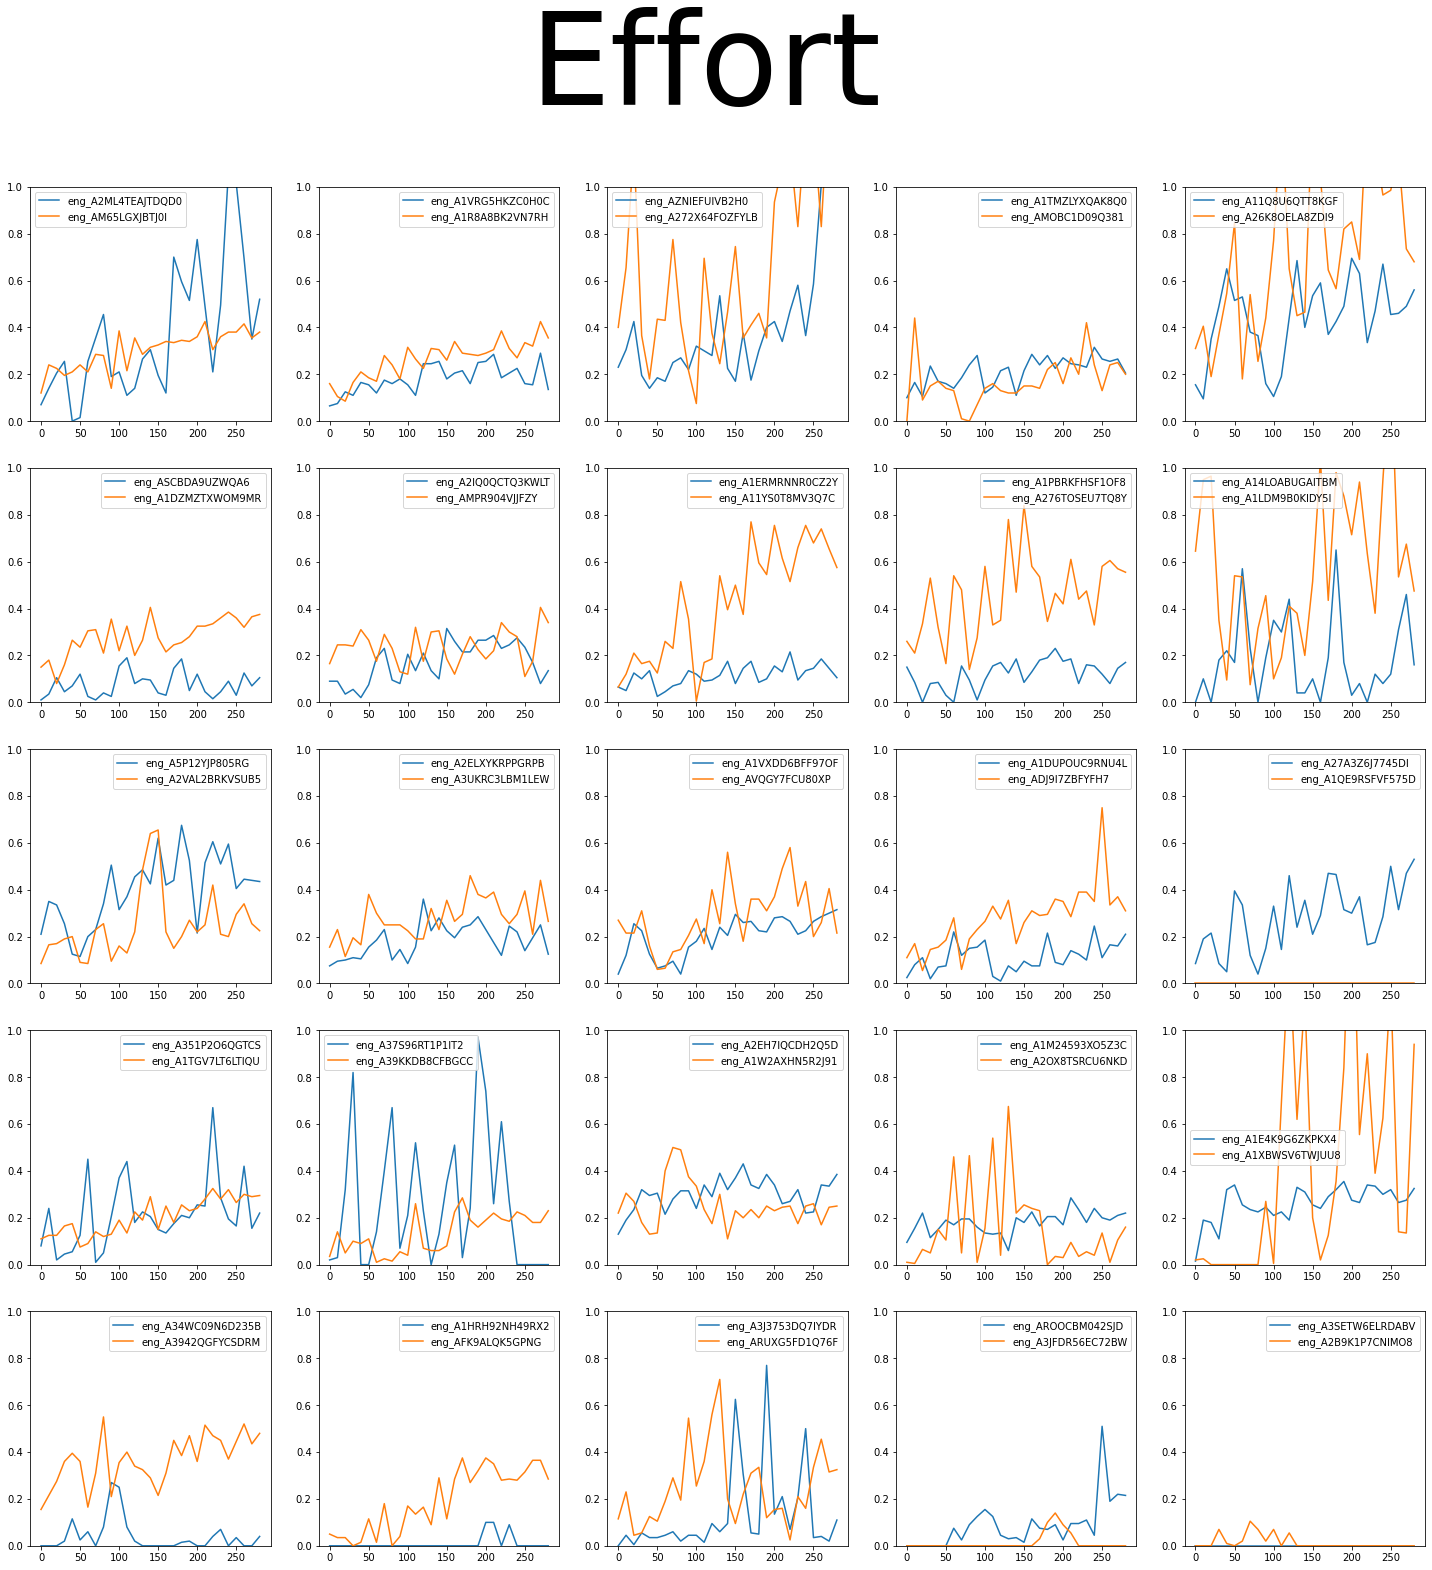

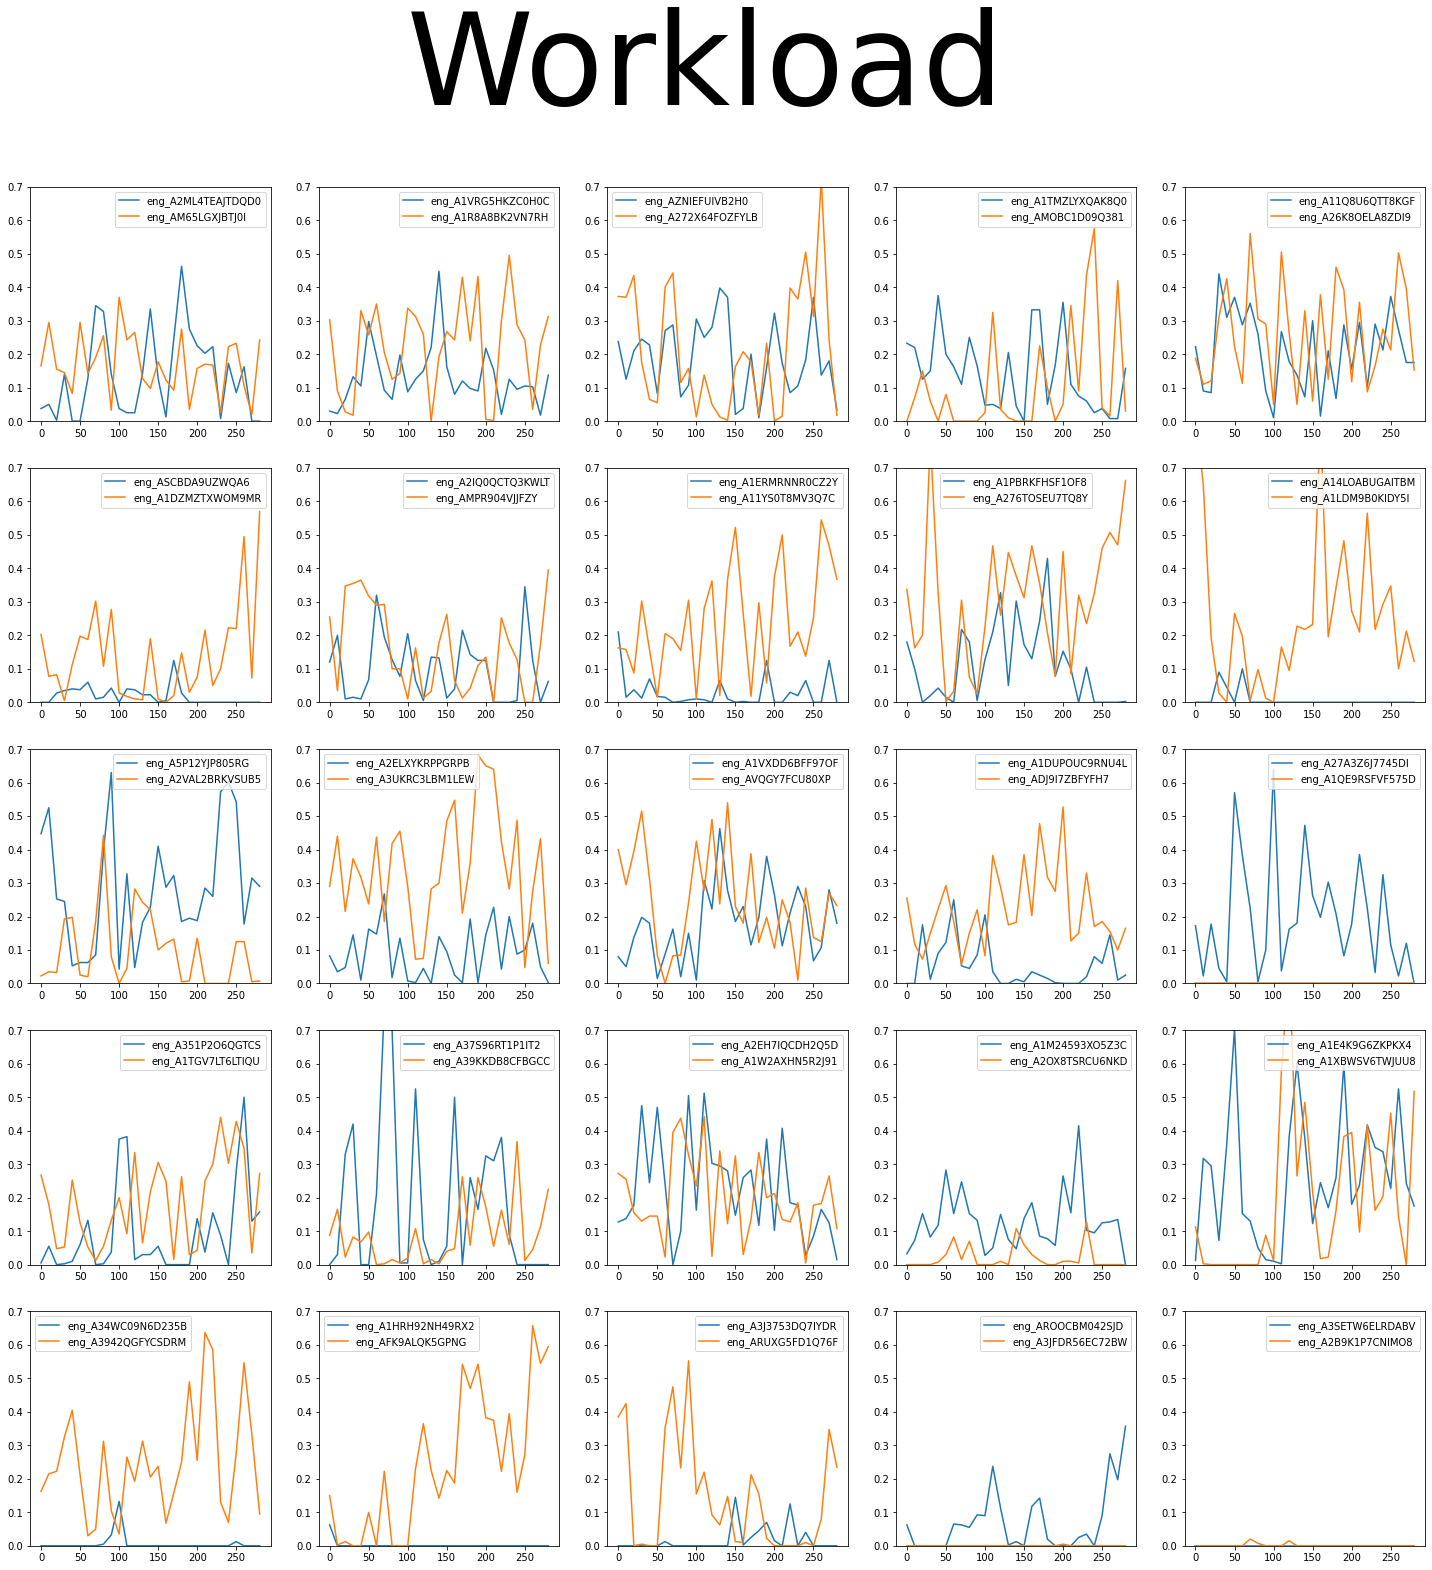

In [245]:
skill_fig, skill_axis = plt.subplots(5, 5)
skill_fig.set_size_inches(25, 25)

effort_fig, effort_axis = plt.subplots(5, 5)
effort_fig.set_size_inches(25, 25)

workload_fig, workload_axis = plt.subplots(5, 5)
workload_fig.set_size_inches(25, 25)

for group in data.values():
    for player in group:
        if not player.startswith('eng_'):
            continue


        row = math.floor(group['rank']/5)
        column = group['rank']%5


        skill_axis[row, column].plot(df_eng_global['Time'], group[player]['Skill'],label=player)
        skill_axis[row, column].legend()
        skill_axis[row, column].set_ylim([0,0.5])


        workload_axis[row, column].plot(df_eng_global['Time'], group[player]['Workload'],label=player)
        workload_axis[row, column].legend()
        workload_axis[row, column].set_ylim([0,0.7])

        effort_axis[row, column].plot(df_eng_global['Time'], group[player]['Effort'],label=player)
        effort_axis[row, column].legend()
        effort_axis[row, column].set_ylim([0,1])

skill_fig.suptitle('Skill',fontsize=128)
skill_fig.savefig('Skill Eng', facecolor='w')


effort_fig.suptitle('Effort',fontsize=128)
effort_fig.savefig('Effort Eng', facecolor='w')

workload_fig.suptitle('Workload',fontsize=128)
workload_fig.savefig('Workload Eng', facecolor='w')